# HR Attrition Modeling: Exploratory Data Analysis

This notebook performs exploratory data analysis (EDA) on the HR Attrition dataset. The goal is to identify trends and insights related to employee attrition that can inform predictive modeling.

In [5]:
# Basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For cleaner visuals
sns.set(style='whitegrid')
%matplotlib inline

# Load dataset
df = pd.read_csv("../data/ibm_attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Data Snapshot & Basic Info
Check for dimensions, column types, missing values, and class distribution for Attrition.

In [13]:
# Shape and column types
print("Shape:", df.shape)
df.info()

# Missing values
df.isnull().sum().sort_values(ascending=False)

# Unique values per column
df.nunique().sort_values()

# Describe numeric columns
df.describe()

Shape: (1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLev

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Target Variable (Attrition) Distribution
Visualize the proportion of employees who have left the company.

C:\Users\mturner\AppData\Local\Temp\ipykernel_6052\1034173672.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=df, palette='Set2')


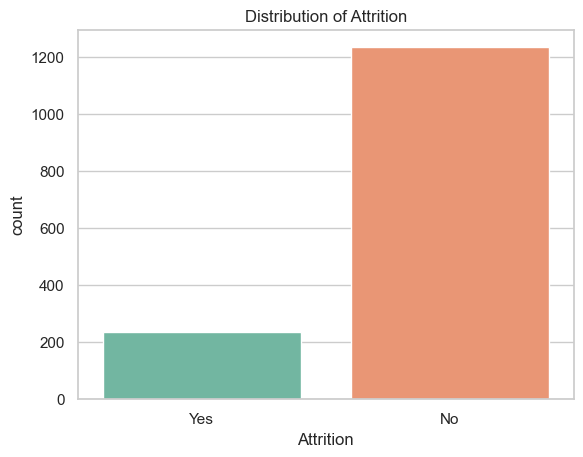

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

In [11]:
sns.countplot(x='Attrition', data=df, palette='Set2')
plt.title("Distribution of Attrition")
plt.show()

# Display percentages
df['Attrition'].value_counts(normalize=True)

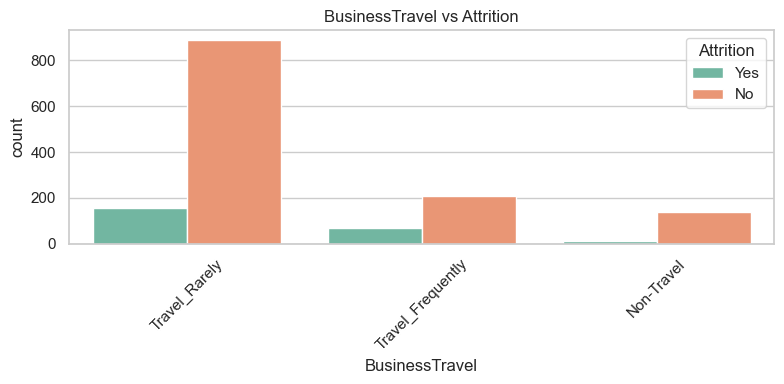

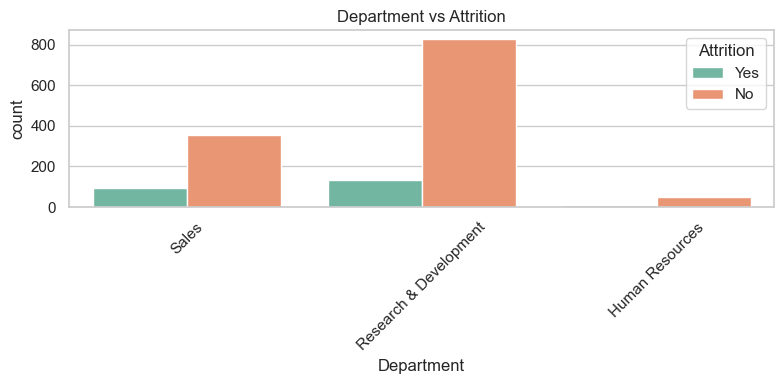

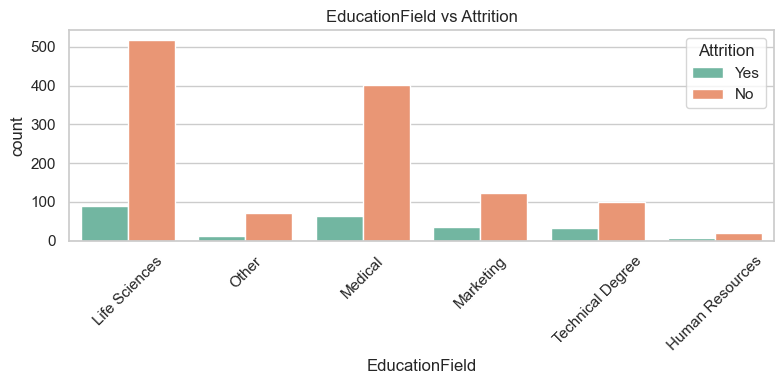

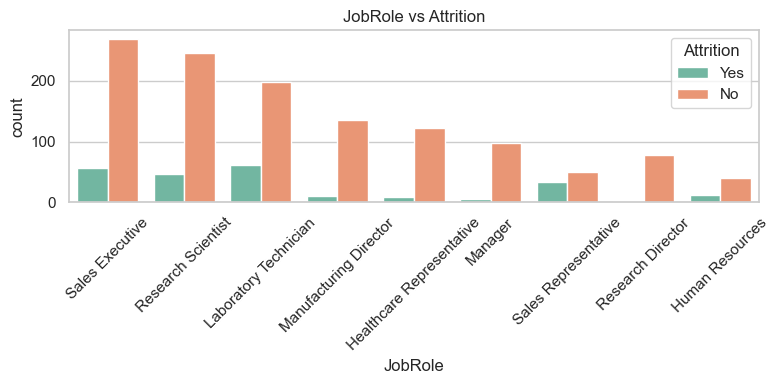

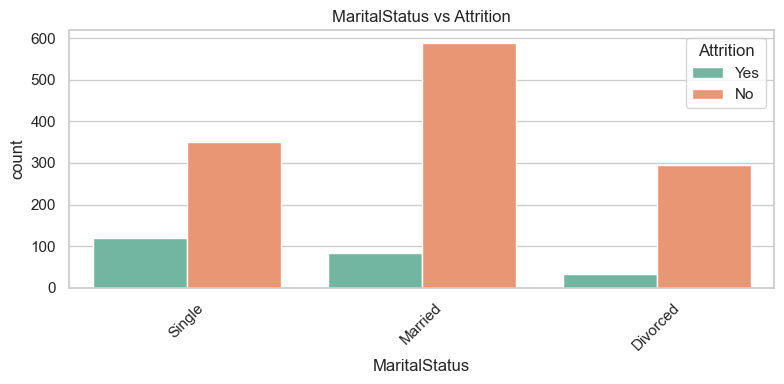

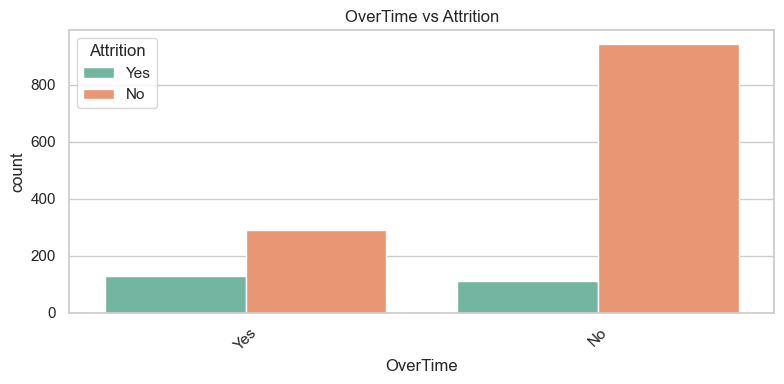

In [15]:
categorical = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']

for col in categorical:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='Attrition', palette='Set2')
    plt.xticks(rotation=45)
    plt.title(f'{col} vs Attrition')
    plt.tight_layout()
    plt.show()

## Distribution of Numerical Features by Attrition Status
Visualize numerical feature distributions across attrition classes.

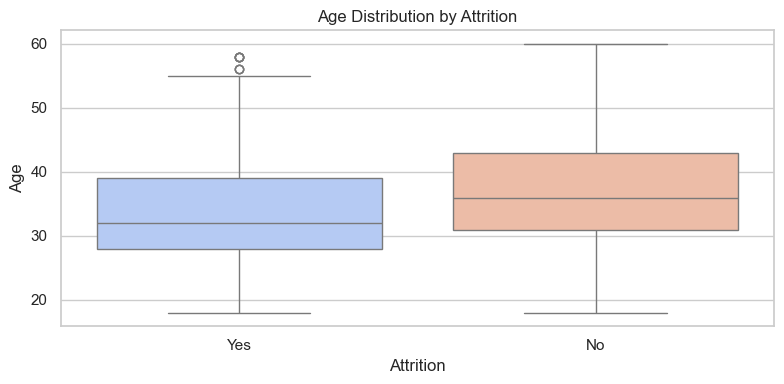

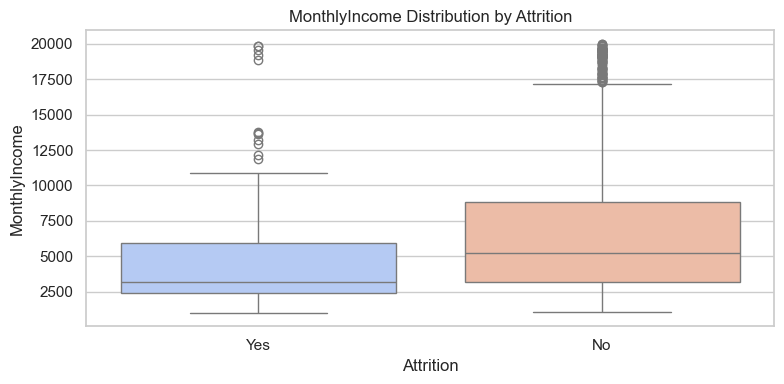

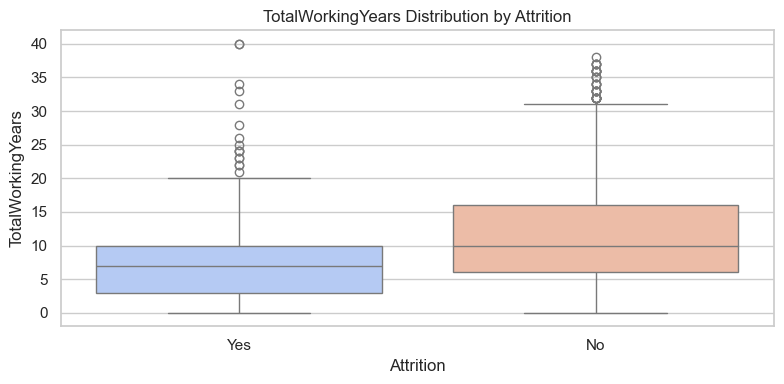

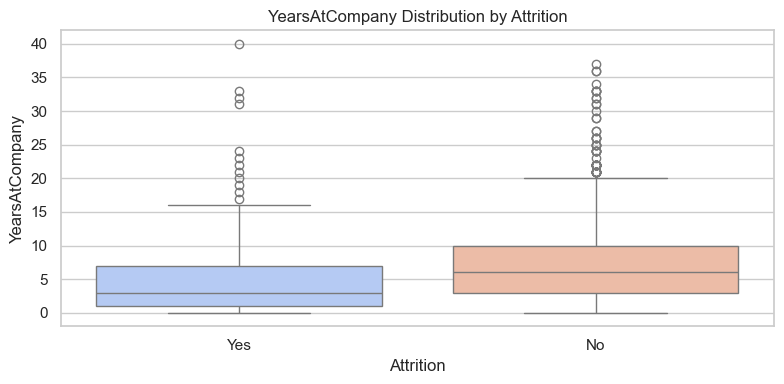

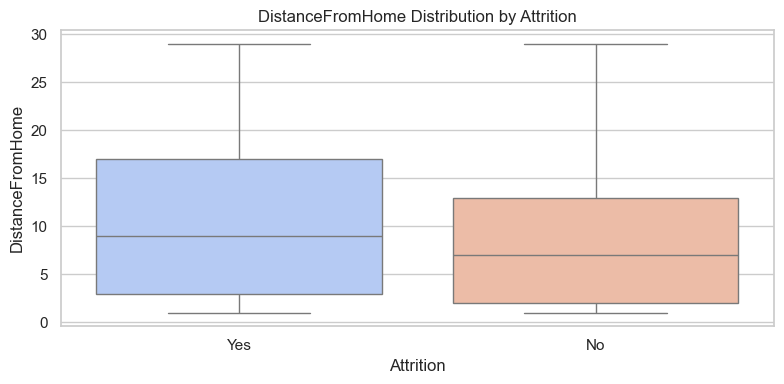

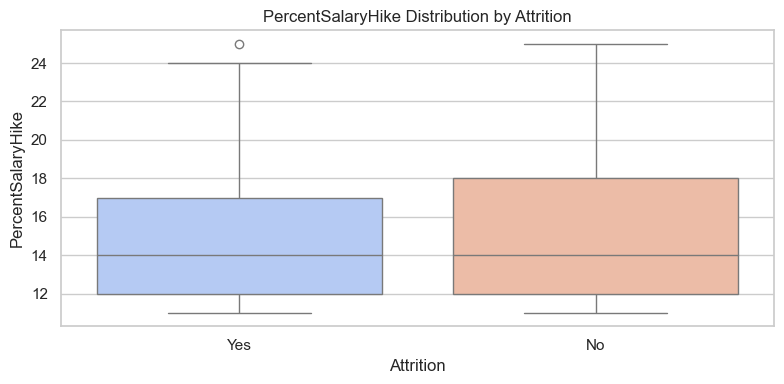

In [14]:
important_cols = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany','DistanceFromHome', 'PercentSalaryHike']
for col in important_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Attrition', y=col, hue='Attrition', data=df, palette='coolwarm', dodge=False, legend=False)
    plt.title(f'{col} Distribution by Attrition')
    plt.xlabel("Attrition")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

## Correlation Matrix
Explore correlations between numerical variables and identify strong relationships.

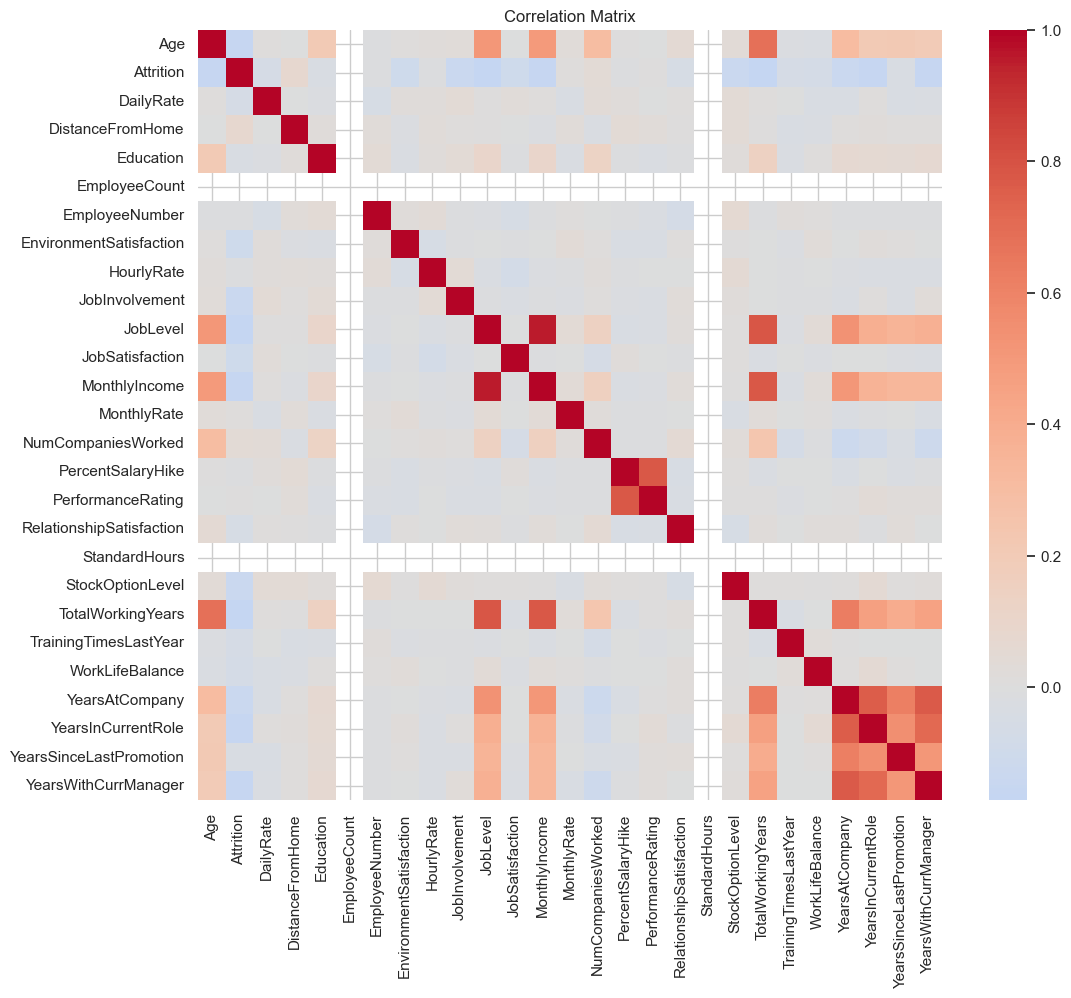

In [16]:
# Convert target to binary
df_corr = df.copy()
df_corr['Attrition'] = df_corr['Attrition'].map({'Yes': 1, 'No': 0})

# Correlation
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr.corr(numeric_only=True), cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

### Key Insights from EDA

- **Attrition Imbalance**: About 16% of employees left the company. 
- **OverTime & Job Role**: Employees who worked overtime or held sales roles had higher attrition.
- **Age & Income**: Lower age and lower income levels were more common on among employees who left.
- **TotalWorkingYears & YearsAtCompany**: Shorter tenures correlate with higher attrition, suggesting employees who spent more time working at the company are less likely to leave their job.
- **Correlation**: Most features had weak correlations, reinforcing the need for non-linear modeling methods.